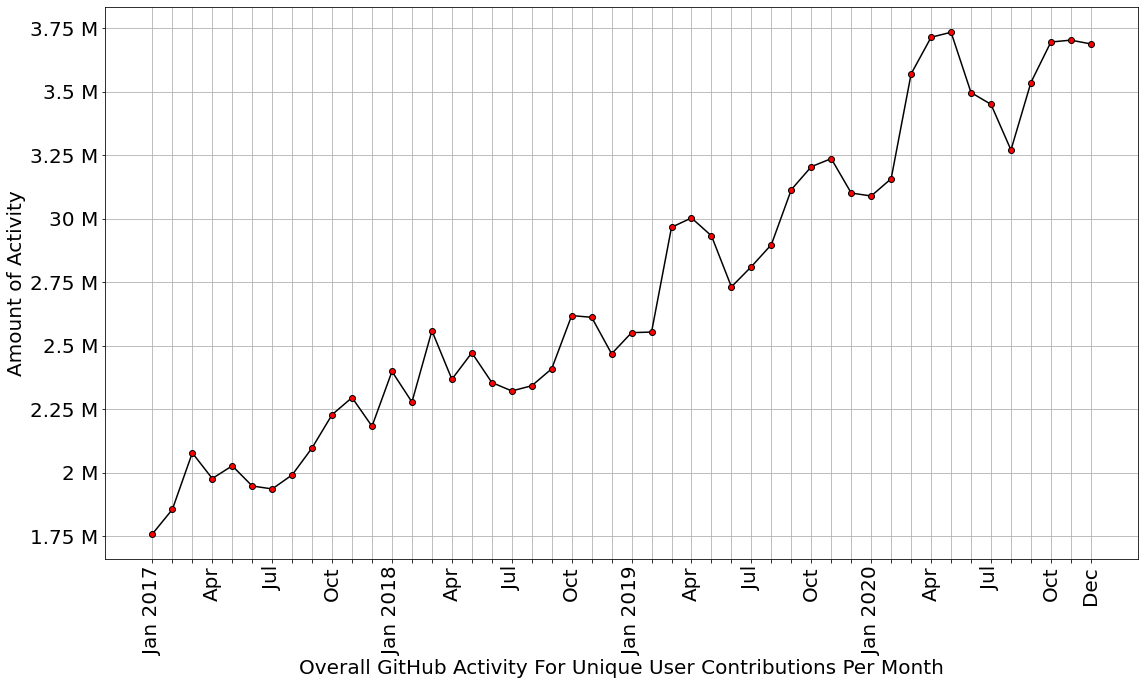

In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

data1=['Jan 2017','Feb 2017','March 2017','April 2017', 'May 2017','June 2017','July 2017','August 2017','September 2017','October 2017','November 2017','December 2017',
     'Jan 2018','Feb 2018','March 2018','April 2018', 'May 2018','June 2018','July 2018','August 2018','September 2018','October 2018','November 2018','December 2018',
       'Jan 2019','Feb 2019','March 2019','April 2019', 'May 2019','June 2019','July 2019','August 2019','September 2019','October 2019','November 2019','December 2019',
       'Jan 2020','Feb 2020','March 2020','April 2020', 'May 2020','June 2020','July 2020','August 2020','September 2020','October 2020','November 2020','December 2020']


datausers=[1758990,1855467,2078211,1977231,2027340,1947883,1936254,1991456,2097975,2228779,2295956,2182999,
2398878,2278458,2559189,2368137,2472376,2355343,2322098,2342499,2409504,2618788,2612100,2468368,
           
2551639,2553974,2966556,3003282,2932860,2731964,2811619,2898165,3114709,3205097,3236808,3101317,
3089723,3157747,3570547,3714626,3734403,3496916,3450614,3270910,3536509,3695932,3703366,3688436]


#Statitionary versus Non Statitionary
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib.pyplot as plt
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
my_xticks=['Jan 2017','','','Apr','','','Jul','','','Oct','','','Jan 2018','','','Apr','','','Jul','','','Oct','','','Jan 2019','','','Apr','','','Jul','','','Oct','','','Jan 2020','','','Apr','','','Jul','','','Oct','','Dec']
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(data1,datausers, '-o',color='black',markerfacecolor='r')
plt.xticks(data1, my_xticks,fontsize=20,rotation=90)
ax.set_yticklabels(['1.5 M', '1.75 M', '2 M', '2.25 M', '2.5 M','2.75 M','30 M','3.25 M','3.5 M','3.75 M','4 M'],fontsize=20)

plt.yticks(fontsize=20)
plt.grid()
plt.xlabel("Overall GitHub Activity For Unique User Contributions Per Month", fontsize=20)
plt.gcf().subplots_adjust(bottom=0.15)
plt.ylabel('Amount of Activity',fontsize=20)
fig.set_size_inches(18.5, 10.5)

In [ ]:
X = datausers
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.041668
p-value: 0.954947
Critical Values:
	1%: -3.593
	5%: -2.932
	10%: -2.604


In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')



In [ ]:

series = X
kpss_test(series)

KPSS Statistic: 0.5531901215835356
p-value: 0.029686909553257732
num lags: 10
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


              Date   counts
0         Jan 2017  1758990
1         Feb 2017  1855467
2       March 2017  2078211
3       April 2017  1977231
4         May 2017  2027340
5        June 2017  1947883
6        July 2017  1936254
7      August 2017  1991456
8   September 2017  2097975
9     October 2017  2228779
10   November 2017  2295956
11   December 2017  2182999
12        Jan 2018  2398878
13        Feb 2018  2278458
14      March 2018  2559189
15      April 2018  2368137
16        May 2018  2472376
17       June 2018  2355343
18       July 2018  2322098
19     August 2018  2342499
20  September 2018  2409504
21    October 2018  2618788
22   November 2018  2612100
23   December 2018  2468368
24        Jan 2019  2551639
25        Feb 2019  2553974
26      March 2019  2966556
27      April 2019  3003282
28        May 2019  2932860
29       June 2019  2731964
30       July 2019  2811619
31     August 2019  2898165
32  September 2019  3114709
33    October 2019  3205097
34   November 2019  

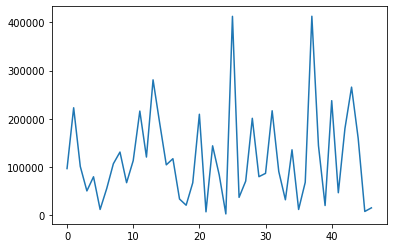

In [ ]:
data_unique_user_activity=pd.DataFrame()
df = pd.DataFrame({"Date":data1,"counts":datausers})
print(df) 
df['count_delta'] = df['counts'].diff().shift(-1).abs()
df['count_delta'].plot()


In [ ]:
data3=df.head(47)
print(data3)

              Date   counts  count_delta
0         Jan 2017  1758990      96477.0
1         Feb 2017  1855467     222744.0
2       March 2017  2078211     100980.0
3       April 2017  1977231      50109.0
4         May 2017  2027340      79457.0
5        June 2017  1947883      11629.0
6        July 2017  1936254      55202.0
7      August 2017  1991456     106519.0
8   September 2017  2097975     130804.0
9     October 2017  2228779      67177.0
10   November 2017  2295956     112957.0
11   December 2017  2182999     215879.0
12        Jan 2018  2398878     120420.0
13        Feb 2018  2278458     280731.0
14      March 2018  2559189     191052.0
15      April 2018  2368137     104239.0
16        May 2018  2472376     117033.0
17       June 2018  2355343      33245.0
18       July 2018  2322098      20401.0
19     August 2018  2342499      67005.0
20  September 2018  2409504     209284.0
21    October 2018  2618788       6688.0
22   November 2018  2612100     143732.0
23   December 20

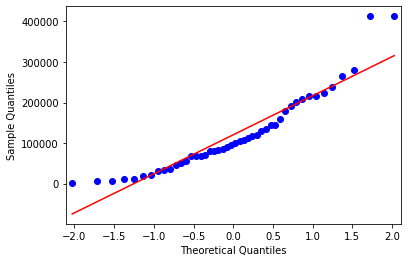

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
qqplot(df['count_delta'].head(46), line='s')
pyplot.show()

#fits like a gaussian dstribution 

In [ ]:
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
#t, p = ttest_ind(df['count_delta'].head(35),df['count_delta'].tail(10))
#print(p)

data1=df['count_delta'].head(36)
data2=df['count_delta']
data_pt2=data2[36:46]
print(data_pt2)


t, p = ttest_ind(data1,data_pt2)
print(p)

36     68024.0
37    412800.0
38    144079.0
39     19777.0
40    237487.0
41     46302.0
42    179704.0
43    265599.0
44    159423.0
45      7434.0
Name: count_delta, dtype: float64
0.22113304766986683


In [ ]:
#since the p value is > 0.05 #there is a difference among the deltas between 2017-19 and 2020. 
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       #dfoutput['Critical Value (%s)'%key] = value
      print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')

In [ ]:
print(df["count_delta"])
stat, p = shapiro(df["count_delta"].tail(10))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

0      96477.0
1     222744.0
2     100980.0
3      50109.0
4      79457.0
5      11629.0
6      55202.0
7     106519.0
8     130804.0
9      67177.0
10    112957.0
11    215879.0
12    120420.0
13    280731.0
14    191052.0
15    104239.0
16    117033.0
17     33245.0
18     20401.0
19     67005.0
20    209284.0
21      6688.0
22    143732.0
23     83271.0
24      2335.0
25    412582.0
26     36726.0
27     70422.0
28    200896.0
29     79655.0
30     86546.0
31    216544.0
32     90388.0
33     31711.0
34    135491.0
35     11594.0
36     68024.0
37    412800.0
38    144079.0
39     19777.0
40    237487.0
41     46302.0
42    179704.0
43    265599.0
44    159423.0
45      7434.0
46     14930.0
47         NaN
Name: count_delta, dtype: float64
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)
